In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.metrics import mean_squared_error, r2_score, f1_score
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
sns.set_style('whitegrid')

In [2]:
dfPuntos = pd.read_csv("dataLimpio/dfPuntos.csv",index_col=0)
dfPuntos

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,female,male,wep,activity_category
id,,,,,,,,,,,,
1,male,58,187,87,23,111,40.8,190,False,True,138,7
2,male,39,165,69,30,108,41.0,195,False,True,150,7
3,female,60,152,54,3,86,38.5,14,True,False,12,5
4,male,22,188,80,11,86,40.1,28,False,True,44,5
5,male,41,178,87,15,83,40.3,48,False,True,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,female,23,160,58,26,101,40.7,144,True,False,130,7
9997,female,57,161,61,23,102,40.5,143,True,False,115,7
9998,male,36,172,70,7,87,39.3,22,False,True,28,5


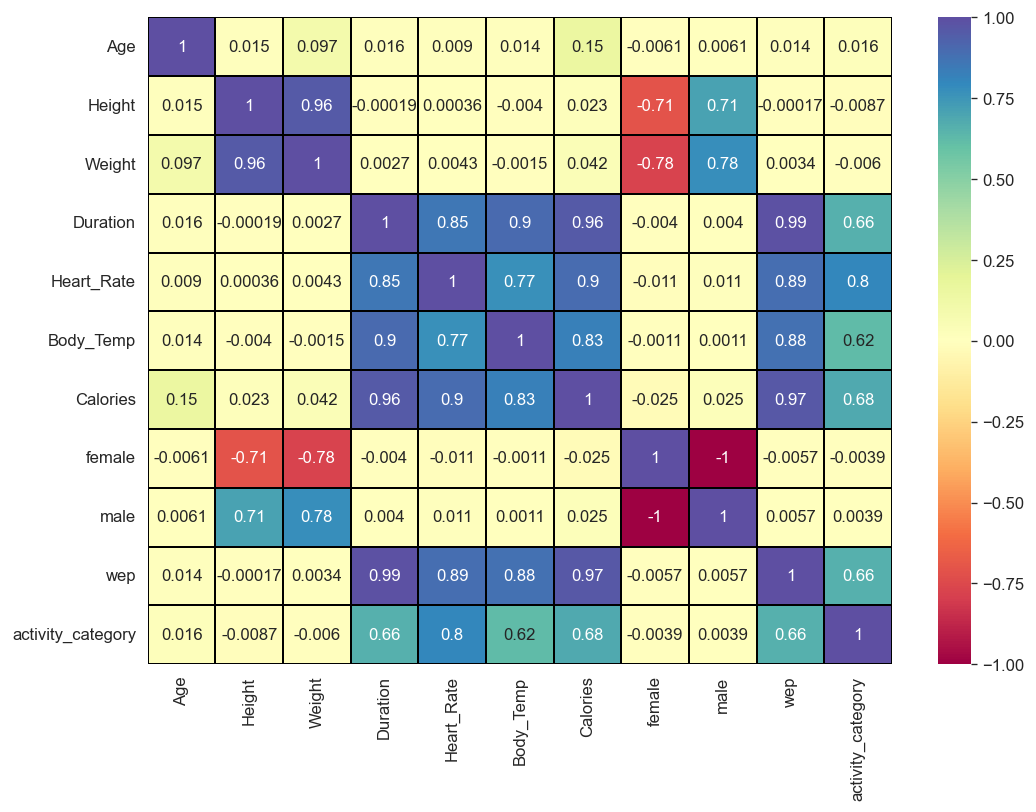

In [3]:
sns.heatmap(dfPuntos.corr(numeric_only=True), annot=True,vmax=1,vmin=-1,cmap="Spectral", linecolor="black",linewidths=1);

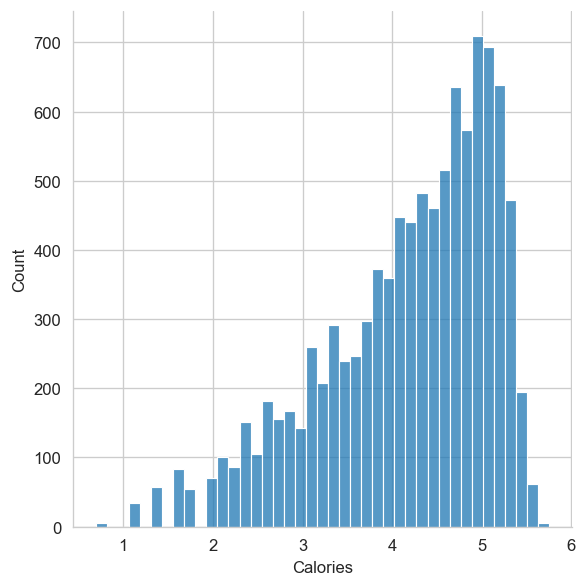

In [30]:
sns.displot(np.log1p(dfPuntos['Calories']));

In [4]:
dfPuntos.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'female', 'male', 'wep', 'activity_category'],
      dtype='object')

In [31]:
X = dfPuntos[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate','female', 'male', 'wep', 'activity_category']]
yLog = np.log1p(dfPuntos["Calories"])

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, yLog, test_size = 0.20, random_state=42) 

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
gbr_model = GradientBoostingRegressor(n_estimators=500 , learning_rate= 0.1, max_depth= 3, min_samples_leaf= 1, min_samples_split= 6,random_state=42,verbose=1)
gbr_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7539            6.49s
         2           0.6196            6.64s
         3           0.5102            8.33s
         4           0.4213            7.60s
         5           0.3485            7.26s
         6           0.2893            7.33s
         7           0.2413            7.33s
         8           0.2018            8.20s
         9           0.1695            7.99s
        10           0.1432            8.39s
        20           0.0342            8.70s
        30           0.0135            8.93s
        40           0.0073            7.64s
        50           0.0048            7.15s
        60           0.0037            6.82s
        70           0.0029            6.35s
        80           0.0023            6.16s
        90           0.0020            6.23s
       100           0.0017            5.87s
       200           0.0009            3.80s
       300           0.0006            2.48s
       40

GradientBoostingRegressor(min_samples_split=6, n_estimators=500,
                          random_state=42, verbose=1)

In [36]:
gbr_model1 = GradientBoostingRegressor(n_estimators=500 , random_state=42,verbose=1)
gbr_model1.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           0.7539           10.40s
         2           0.6196            8.12s
         3           0.5102            7.98s
         4           0.4213            7.95s
         5           0.3485            7.64s
         6           0.2893            7.45s
         7           0.2413            8.10s
         8           0.2018            8.12s
         9           0.1695            8.82s
        10           0.1432            8.67s
        20           0.0342            9.06s
        30           0.0135            8.83s
        40           0.0073            7.60s
        50           0.0048            6.83s
        60           0.0037            6.19s
        70           0.0029            5.92s
        80           0.0023            5.59s
        90           0.0020            5.43s
       100           0.0017            5.48s
       200           0.0009            3.34s
       300           0.0006            2.28s
       40

GradientBoostingRegressor(n_estimators=500, random_state=42, verbose=1)

In [35]:
import xgboost

xgb_model = xgboost.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Tarda 30 min en hacer el FIT

In [17]:
#from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 6,7,8],
    'min_samples_split': [5,6,7],
    'min_samples_leaf': [1,3,4]
}

gbr_model = GradientBoostingRegressor(n_estimators=500 , random_state=42)

grid_search = GridSearchCV(gbr_model, param_grid, scoring='neg_mean_absolute_error', cv=3,)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best MAE: 0.017482142016598482


In [27]:
importances = grid_search.best_estimator_.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"Variable {i + 1}: {feature} - Importancia: {importances[i]}")

Variable 1: Duration - Importancia: 0.015511986725796949
Variable 2: Heart_Rate - Importancia: 3.0986634125020896e-05
Variable 3: wep - Importancia: 0.0018415689710133403
Variable 4: activity_category - Importancia: 0.020642086157164334


In [64]:
importances = xgb_model.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"Variable {i + 1}: {feature} - Importancia: {importances[i]}")

Variable 1: Age - Importancia: 0.003893402637913823
Variable 2: Height - Importancia: 8.819768845569342e-05
Variable 3: Weight - Importancia: 0.0008562260773032904
Variable 4: Duration - Importancia: 0.016794508323073387
Variable 5: Heart_Rate - Importancia: 0.004045156296342611
Variable 6: female - Importancia: 0.006497860886156559
Variable 7: male - Importancia: 0.0
Variable 8: wep - Importancia: 0.9678246974945068
Variable 9: activity_category - Importancia: 0.0


In [65]:
importances = gbr_model.feature_importances_

for i, feature in enumerate(X.columns):
    print(f"Variable {i + 1}: {feature} - Importancia: {importances[i]}")

Variable 1: Age - Importancia: 0.015511986725796949
Variable 2: Height - Importancia: 3.0986634125020896e-05
Variable 3: Weight - Importancia: 0.0018415689710133403
Variable 4: Duration - Importancia: 0.020642086157164334
Variable 5: Heart_Rate - Importancia: 0.03921828723426815
Variable 6: female - Importancia: 0.0034434008127403122
Variable 7: male - Importancia: 0.001863429612775998
Variable 8: wep - Importancia: 0.9134368078623948
Variable 9: activity_category - Importancia: 0.004011445989721105


In [63]:
from sklearn.metrics import mean_absolute_error, f1_score, r2_score, completeness_score

y_predLog = gbr_model.predict(X_test)
y_pred = np.expm1(y_predLog)

print(gbr_model.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred).round(2))
print("MSE", mean_squared_error(y_test, y_pred).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)).round(2))
#print("F1 score", f1_score(y_test, y_pred))
print("----------------------------------------------------------------")

y_predLog = xgb_model.predict(X_test)
y_pred = np.expm1(y_predLog)

print(xgb_model.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred).round(2))
print("MSE", mean_squared_error(y_test, y_pred).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)).round(2))
#print("F1 score", f1_score(y_test, y_pred))
print("----------------------------------------------------------------")


y_predLog = gbr_model1.predict(X_test)
y_pred = np.expm1(y_predLog)

print(gbr_model1.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred).round(2))
print("MSE", mean_squared_error(y_test, y_pred).round(2))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)).round(2))
#print("F1 score", f1_score(y_test, y_pred))
print("----------------------------------------------------------------")

0.9992362342377573
MAE 84.58
MSE 10919.1
RMSE 104.49
----------------------------------------------------------------
0.9986500117146685
MAE 84.56
MSE 10910.04
RMSE 104.45
----------------------------------------------------------------
0.999260445695188
MAE 84.58
MSE 10918.89
RMSE 104.49
----------------------------------------------------------------


In [15]:
X = dfPuntos[['Duration', 'Heart_Rate','wep', 'activity_category']]
yLog = np.log1p(dfPuntos["Calories"])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, yLog, test_size = 0.20, random_state=42) 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
gbr_model1 = GradientBoostingRegressor(n_estimators=500 , random_state=42,verbose=1)
gbr_model1.fit(X_train, y_train)

import xgboost

xgb_model = xgboost.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

gbr_model = GradientBoostingRegressor(n_estimators=500 , learning_rate= 0.1, max_depth= 3, min_samples_leaf= 1, min_samples_split= 6,random_state=42,verbose=1)
gbr_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7539            2.99s
         2           0.6196            3.07s
         3           0.5102            2.85s
         4           0.4213            2.75s
         5           0.3485            2.96s
         6           0.2893            2.94s
         7           0.2413            3.23s
         8           0.2019            3.62s
         9           0.1697            3.57s
        10           0.1435            3.56s
        20           0.0400            3.88s
        30           0.0250            4.33s
        40           0.0224            4.32s
        50           0.0216            4.19s
        60           0.0213            3.78s
        70           0.0211            3.44s
        80           0.0210            3.14s
        90           0.0209            2.88s
       100           0.0208            2.71s
       200           0.0204            1.68s
       300           0.0202            1.02s
       40

GradientBoostingRegressor(min_samples_split=6, n_estimators=500,
                          random_state=42, verbose=1)

In [17]:
y_predLog = xgb_model.predict(X_test)
y_pred = np.expm1(y_predLog)

print(xgb_model.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----------------------------------------------------------------")


y_predLog = gbr_model1.predict(X_test)
y_pred = np.expm1(y_predLog)

print(gbr_model1.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("----------------------------------------------------------------")

y_predLog = gbr_model.predict(X_test)
y_pred = np.expm1(y_predLog)

print(gbr_model.score(X_test,y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
#print("F1 score", f1_score(y_test, y_pred))
print("----------------------------------------------------------------")

0.9739936250940383
MAE 84.17669713873275
MSE 10695.920627410926
RMSE 103.42108405644821
----------------------------------------------------------------
0.9745295429198502
MAE 84.0958844932528
MSE 10672.176853722578
RMSE 103.30622853304915
----------------------------------------------------------------
0.974669140964321
MAE 84.10259183409646
MSE 10673.390734624172
RMSE 103.3121035243411
----------------------------------------------------------------


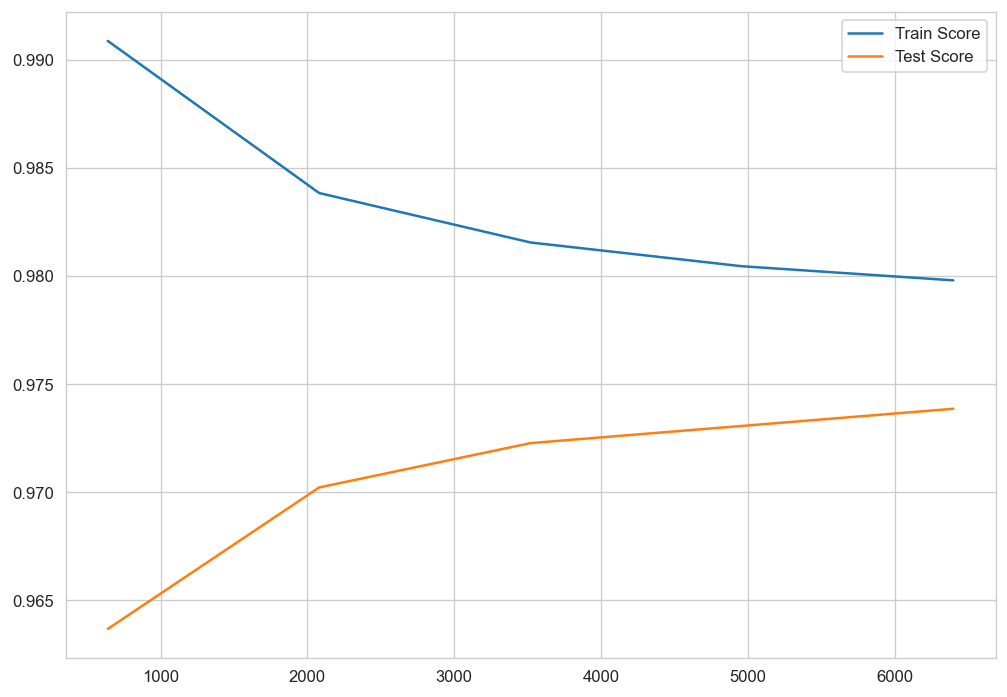

In [18]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test Score")
plt.legend()
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(xgb_model, scaler.transform(X), (yLog), cv=5, scoring="neg_mean_absolute_error")
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[-0.10999065 -0.10996469 -0.11278321 -0.11394989 -0.11363175]
-0.11206403746079549
0.001745711795935731


In [21]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(gbr_model, scaler.transform(X), (yLog), cv=5, scoring="neg_mean_absolute_error")
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

      Iter       Train Loss   Remaining Time 
         1           0.7605            5.76s
         2           0.6251            3.96s
         3           0.5146            3.64s
         4           0.4246            3.47s
         5           0.3518            3.17s
         6           0.2921            3.14s
         7           0.2435            3.11s
         8           0.2036            3.09s
         9           0.1713            2.98s
        10           0.1449            2.92s
        20           0.0403            4.21s
        30           0.0250            4.08s
        40           0.0224            4.38s
        50           0.0217            4.72s
        60           0.0215            4.84s
        70           0.0213            4.43s
        80           0.0212            4.10s
        90           0.0211            3.78s
       100           0.0210            3.57s
       200           0.0207            2.13s
       300           0.0205            1.26s
       40

In [22]:
from sklearn.model_selection import cross_val_score

results_cv = cross_val_score(gbr_model1, scaler.transform(X), (yLog), cv=5, scoring="neg_mean_absolute_error")
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

      Iter       Train Loss   Remaining Time 
         1           0.7605            2.71s
         2           0.6251            2.62s
         3           0.5146            3.78s
         4           0.4246            3.54s
         5           0.3518            4.23s
         6           0.2921            5.66s
         7           0.2435            5.34s
         8           0.2036            5.21s
         9           0.1713            4.89s
        10           0.1449            5.07s
        20           0.0403            4.20s
        30           0.0250            4.30s
        40           0.0224            4.49s
        50           0.0217            4.31s
        60           0.0215            4.19s
        70           0.0213            3.91s
        80           0.0212            3.61s
        90           0.0211            3.26s
       100           0.0210            3.10s
       200           0.0207            1.77s
       300           0.0205            1.07s
       40

In [20]:
# Guardar el modelo
import pickle

with open('models/xgb_model.pkl', "wb") as archivo_salida:
    pickle.dump(xgb_model, archivo_salida)


In [31]:
# Para volver a leer el modelo
with open('models/xgb_model.pkl', "rb") as archivo_entrada:
    xgb_model = pickle.load(archivo_entrada)
    
xgb_model

GradientBoostingRegressor(n_estimators=500, random_state=42, verbose=1)

In [ ]:
# Guardar el modelo
import pickle

with open('models/finished_model.pkl', "wb") as archivo_salida:
    pickle.dump(gbr_model1, archivo_salida)


In [ ]:
# Para volver a leer el modelo
with open('models/finished_model.pkl', "rb") as archivo_entrada:
    gbr_model1 = pickle.load(archivo_entrada)
    
gbr_model1

GradientBoostingRegressor(n_estimators=500, random_state=42, verbose=1)

In [32]:
dfPuntos.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'female', 'male', 'wep', 'activity_category'],
      dtype='object')

In [38]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfPuntos.drop(columns=["Gender","Calories"]))
df_scaled

array([[ 0.88785164,  0.88956539,  0.80924826, ...,  1.01633337,
         1.28911686,  0.98605509],
       [-0.22619188, -0.65583118, -0.39032916, ...,  1.01633337,
         1.54695098,  0.98605509],
       [ 1.00511938, -1.56902007, -1.38997701, ..., -0.98392912,
        -1.41814135, -0.34537225],
       ...,
       [-0.40209349, -0.16411409, -0.32368597, ...,  1.01633337,
        -1.07436253, -0.34537225],
       [-1.04706605, -0.65583118, -0.85683149, ..., -0.98392912,
        -1.41814135, -3.67394059],
       [ 0.36014682,  1.10030129,  1.40903697, ...,  1.01633337,
         1.33208922,  0.98605509]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [39]:
df_scaled.shape

(10000, 10)

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=df_scaled.shape[1])
X_pca = pca.fit_transform(df_scaled)
X_pca

array([[-2.61651046e+00,  1.85236991e+00,  7.90173783e-01, ...,
        -1.59737573e-01, -1.96226668e-01,  6.16069204e-17],
       [-3.07791753e+00,  4.58091681e-01, -3.97575608e-01, ...,
         1.15307782e-02,  1.32337006e-01,  1.45219848e-16],
       [ 2.85597744e+00, -2.39142732e+00,  1.05007972e+00, ...,
         3.63294711e-02,  1.05928330e-03,  1.02671480e-14],
       ...,
       [ 1.93427795e+00,  7.95026682e-01, -5.21261235e-01, ...,
        -2.41961664e-01,  1.49932361e-02,  1.56074583e-17],
       [ 4.75166821e+00, -1.69813070e+00, -9.50801348e-01, ...,
        -3.01373610e-02,  1.69360676e-02, -2.11525665e-17],
       [-2.36650392e+00,  2.24792920e+00,  3.14809901e-01, ...,
         1.93033866e-01,  9.35024754e-02,  2.49649041e-17]])

In [42]:
len(X_pca[0])

10

In [43]:
pca.explained_variance_ratio_.cumsum()

array([0.4225627 , 0.76964681, 0.87023645, 0.92036498, 0.96888169,
       0.98687153, 0.99614749, 0.99927745, 1.        , 1.        ])

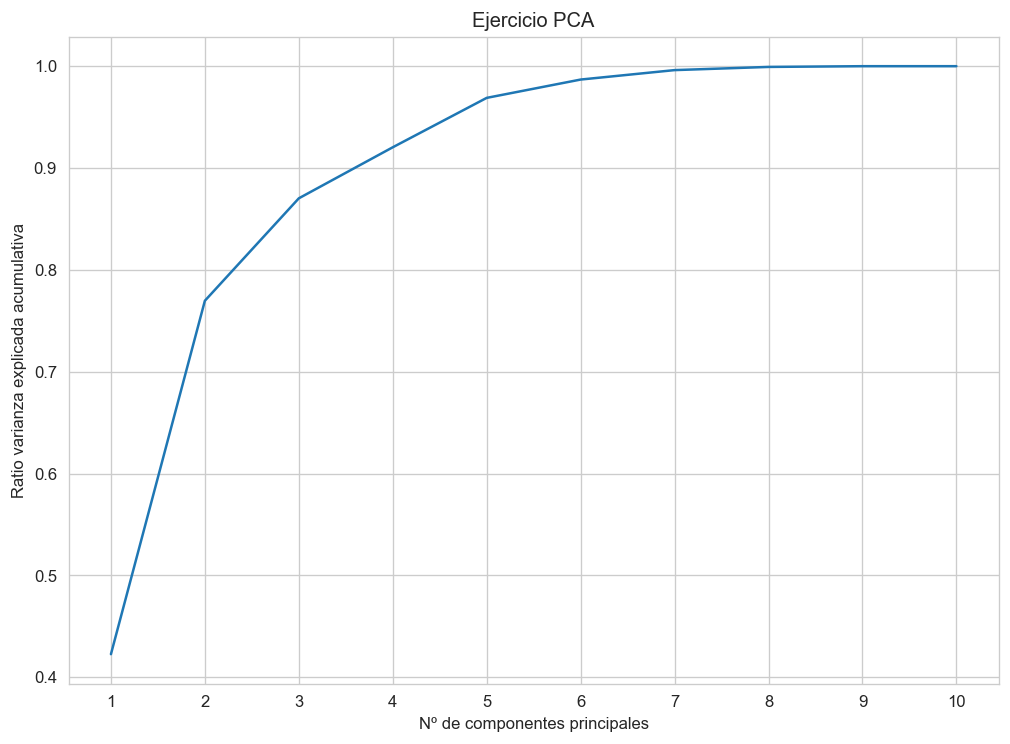

In [44]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,11)))
plt.xlabel("Nº de componentes principales")
plt.ylabel("Ratio varianza explicada acumulativa")
plt.title("Ejercicio PCA")
plt.xticks(np.arange(1,11));

In [45]:
from sklearn.pipeline import make_pipeline

In [46]:
dfPuntosClean = dfPuntos.drop(columns=["Gender","Calories"])

In [47]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=dfPuntosClean.shape[1]))
pca_pipe.fit_transform(dfPuntosClean)

modelo_pca = pca_pipe['pca']

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [48]:
pca_pipe['pca']

PCA(n_components=10)

In [49]:
modelo_pca.components_

array([[-9.73052630e-03, -4.06425906e-03, -6.22307176e-03,
        -4.69341341e-01, -4.56440241e-01, -4.43701313e-01,
         8.62492851e-03, -8.62492851e-03, -4.70235009e-01,
        -3.91267794e-01],
       [ 2.51564880e-02,  4.85369634e-01,  5.07276819e-01,
        -6.35320638e-03, -3.90823571e-03, -8.04087790e-03,
        -5.03110733e-01,  5.03110733e-01, -5.73253930e-03,
        -7.72814656e-03],
       [ 9.93933571e-01, -4.03531569e-03,  7.08955398e-02,
        -3.10536313e-03, -1.00016023e-02, -3.16162680e-03,
         5.87415684e-02, -5.87415684e-02, -5.30881713e-03,
         2.14384656e-03],
       [-5.14010434e-02,  3.68990064e-01,  2.61328024e-01,
         2.35445632e-01, -1.78019893e-01,  2.78598014e-01,
         3.09096796e-01, -3.09096796e-01,  2.03949267e-01,
        -6.28881854e-01],
       [ 6.75455913e-02, -4.55863161e-01, -3.19894330e-01,
         1.86164615e-01, -1.47794653e-01,  2.27627106e-01,
        -3.78883064e-01,  3.78883064e-01,  1.62766048e-01,
        -5.

In [50]:
modelo_pca.explained_variance_ratio_

array([4.22562702e-01, 3.47084111e-01, 1.00589638e-01, 5.01285345e-02,
       4.85167088e-02, 1.79898351e-02, 9.27595743e-03, 3.12996033e-03,
       7.22553639e-04, 4.17045409e-33])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


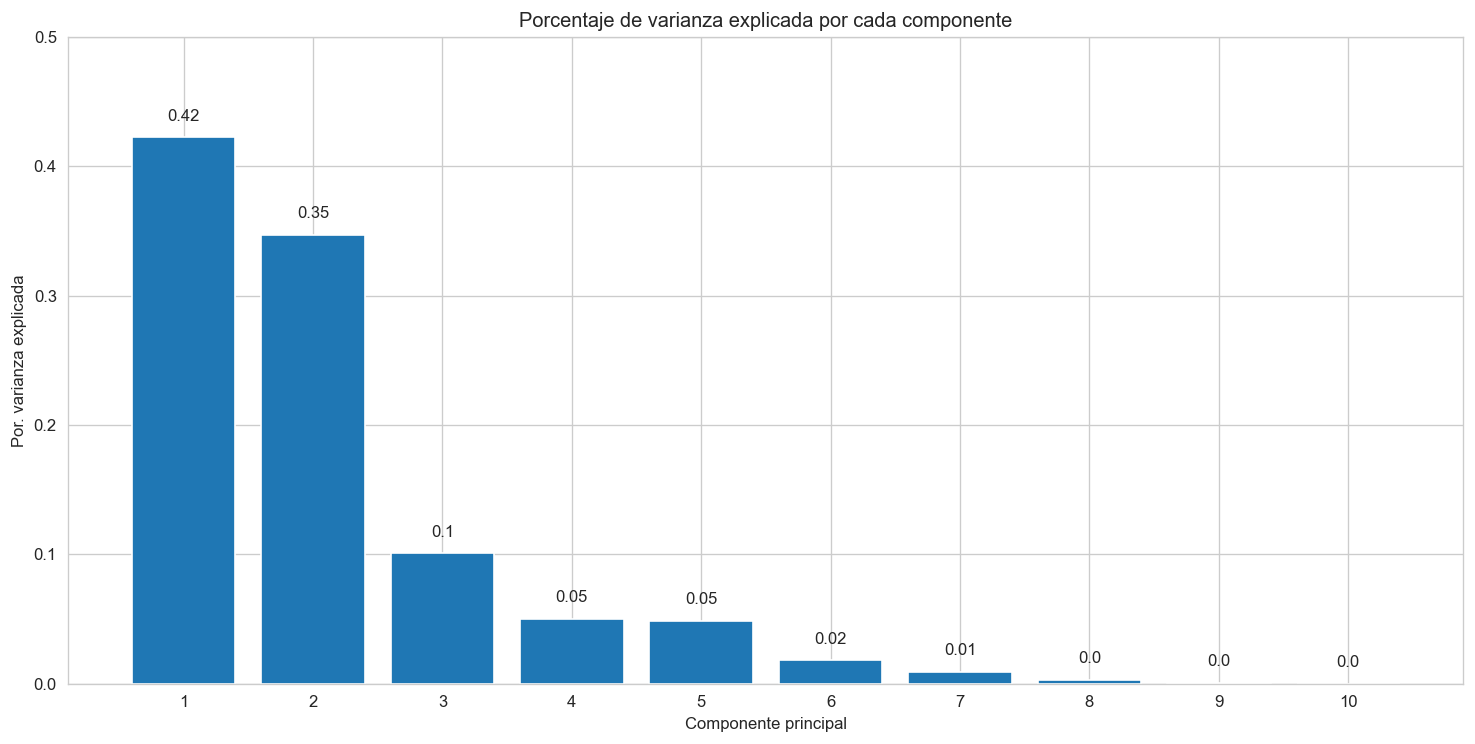

In [52]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
#### CODE ####

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dfPuntosClean.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.5)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [53]:
modelo_pca.explained_variance_ratio_.cumsum()

array([0.4225627 , 0.76964681, 0.87023645, 0.92036498, 0.96888169,
       0.98687153, 0.99614749, 0.99927745, 1.        , 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.4225627  0.76964681 0.87023645 0.92036498 0.96888169 0.98687153
 0.99614749 0.99927745 1.         1.        ]


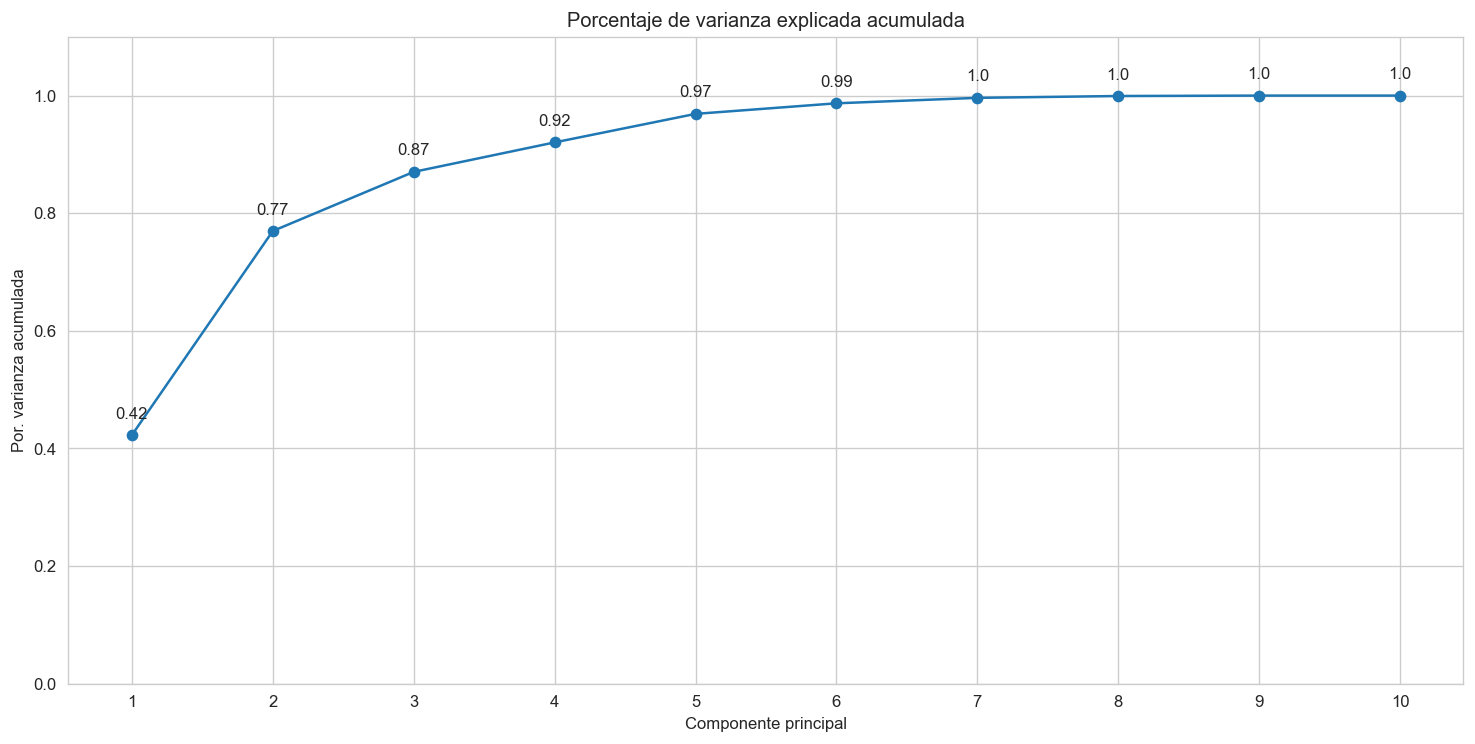

In [54]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
ax.plot(
    np.arange(len(dfPuntosClean.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(dfPuntosClean.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [55]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(df_scaled)

In [56]:
df_pca3 = pd.DataFrame(X_pca3, columns=['PC1', 'PC2',"PC3"])
df_pca3

,PC1,PC2,PC3
0,-2.616510,1.852370,0.790174
1,-3.077918,0.458092,-0.397576
2,2.855977,-2.391427,1.050080
3,1.140212,1.645120,-1.299952
4,0.771784,1.562989,-0.157753
...,...,...,...
9995,-2.097554,-2.109112,-1.133298
9996,-1.732131,-1.917663,0.864645
9997,1.934278,0.795027,-0.521261
9998,4.751668,-1.698131,-0.950801


In [57]:
df_pca_origin = pd.DataFrame(pca3.components_, columns=dfPuntos.drop(columns=["Gender","Calories"]).columns, index=['PC1', 'PC2',"PC3"])
df_pca_origin

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male,wep,activity_category
PC1,-0.009731,-0.004064,-0.006223,-0.469341,-0.456440,-0.443701,0.008625,-0.008625,-0.470235,-0.391268
PC2,0.025156,0.485370,0.507277,-0.006353,-0.003908,-0.008041,-0.503111,0.503111,-0.005733,-0.007728
PC3,0.993934,-0.004035,0.070896,-0.003105,-0.010002,-0.003162,0.058742,-0.058742,-0.005309,0.002144


In [58]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=3))
modelo_pca = pca_pipe['pca']
proyecciones = pca_pipe.fit_transform(X=dfPuntosClean)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2','PC3'],
    index   = dfPuntosClean.index
)
proyecciones.head()

,PC1,PC2,PC3
id,,,
1,-2.616510,1.852370,0.790174
2,-3.077918,0.458092,-0.397576
3,2.855977,-2.391427,1.050080
4,1.140212,1.645120,-1.299952
5,0.771784,1.562989,-0.157753


In [59]:
from sklearn.preprocessing import scale

proyecciones = np.dot(modelo_pca.components_, scale(dfPuntosClean).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2','PC3'])
proyecciones = proyecciones.transpose().set_index(dfPuntosClean.index)
proyecciones.head()

,PC1,PC2,PC3
id,,,
1,-2.616510,1.852370,0.790174
2,-3.077918,0.458092,-0.397576
3,2.855977,-2.391427,1.050080
4,1.140212,1.645120,-1.299952
5,0.771784,1.562989,-0.157753


In [60]:
# Recostruccion de las proyecciones
# ==============================================================================
reconstruccion = pca_pipe.inverse_transform(proyecciones)
reconstruccion = pd.DataFrame(
    reconstruccion,
    columns = dfPuntosClean.columns,
    index = dfPuntosClean.index
)

print('------------------')
print('Valores reconstruidos')
print('------------------')
display(np.expm1(reconstruccion.head()))

print('------------------')
print('Valores Origin')
print('------------------')
display(dfPuntosClean.head())



------------------
Valores reconstruidos
------------------


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male,wep,activity_category
id,,,,,,,,,,
1,9.200679e+24,2.079460e+81,1.272561e+39,1.447243e+11,2.730331e+46,5.903098e+17,0.055601,1.575103,2.791746e+58,1137.735339
2,9.842841e+15,1.496932e+77,9.235714e+33,9.776012e+11,2.428829e+47,7.009016e+17,0.444744,0.881497,1.319584e+63,1511.051697
3,4.921134e+25,2.748487e+68,9.414091e+24,8.904293e+01,1.237701e+36,9.080823e+16,2.166889,-0.141655,7.855155e+06,47.007909
4,1.849427e+09,4.505884e+80,2.002426e+37,6.368608e+04,2.432447e+39,1.614566e+17,0.062959,1.557278,9.716534e+22,123.632009
5,4.865174e+17,2.443882e+80,3.738455e+37,2.625783e+05,1.096725e+40,1.830401e+17,0.120381,1.426213,2.378331e+26,154.483189


------------------
Valores Origin
------------------


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,female,male,wep,activity_category
id,,,,,,,,,,
1,58,187,87,23,111,40.8,False,True,138,7
2,39,165,69,30,108,41.0,False,True,150,7
3,60,152,54,3,86,38.5,True,False,12,5
4,22,188,80,11,86,40.1,False,True,44,5
5,41,178,87,15,83,40.3,False,True,60,5
